In [1]:
from skimage import io
import matplotlib.pyplot as plt

[[[ 20  34  61]
  [ 76  82 106]
  [ 95  91 108]
  ...
  [ 42  41  57]
  [ 51  50  55]
  [  9   8  13]]

 [[ 57  71  98]
  [130 136 160]
  [160 156 173]
  ...
  [ 67  66  82]
  [ 56  55  60]
  [ 14  13  18]]

 [[ 39  53  79]
  [129 135 159]
  [162 158 173]
  ...
  [ 68  67  83]
  [ 60  59  64]
  [ 17  16  21]]

 ...

 [[ 40  47  40]
  [109 116 109]
  [131 138 131]
  ...
  [ 15  11   8]
  [  9   9   9]
  [  9   9   9]]

 [[ 68  74  70]
  [131 138 131]
  [146 153 146]
  ...
  [ 14  10   7]
  [  9   9   9]
  [  9   9   9]]

 [[ 21  26  22]
  [ 64  69  63]
  [ 56  61  55]
  ...
  [ 12   8   5]
  [ 10  10  10]
  [ 10  10  10]]]
(461, 690, 3)


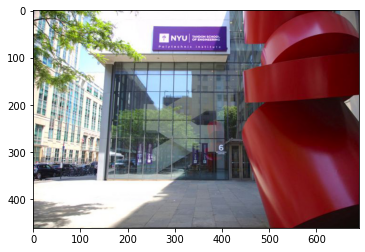

In [2]:
# Reading an image
url = 'http://archive.engineering.nyu.edu/files/imagecache/img_col_8_380/pressrelease/RS46906_071A7857-scr.jpg'
img = io.imread(url)
plt.imshow(img)
print(img)
print(img.shape)

Text(0.5, 1.0, 'Blue')

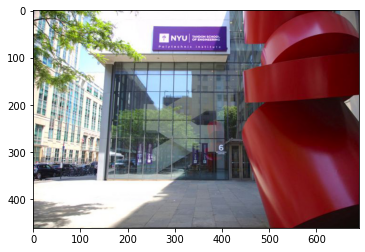

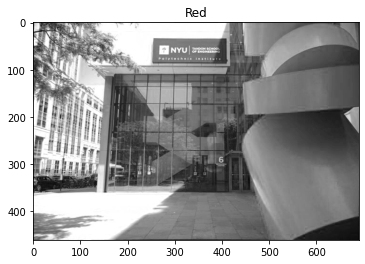

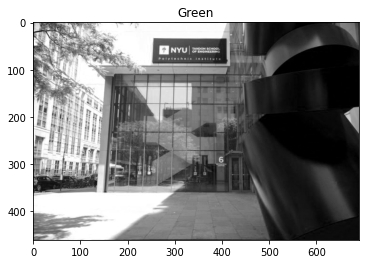

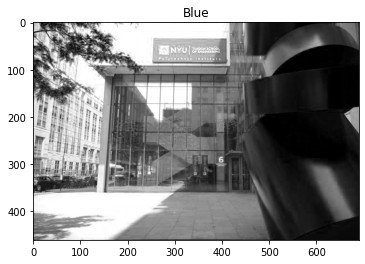

In [3]:
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(img[:,:,0],'gray')
plt.title('Red')
plt.figure()
plt.imshow(img[:,:,1],'gray')
plt.title('Green')
plt.figure()
plt.imshow(img[:,:,2],'gray')
plt.title('Blue')

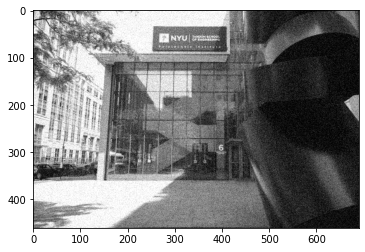

In [4]:
####################################################################
## Demo of use of blurring f

import cv2
import numpy as np
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
noise = np.random.randn(img_gray.shape[0],img_gray.shape[1])
noisy = np.clip(img_gray + 20*noise,0,255)
plt.imshow(noisy,'gray')

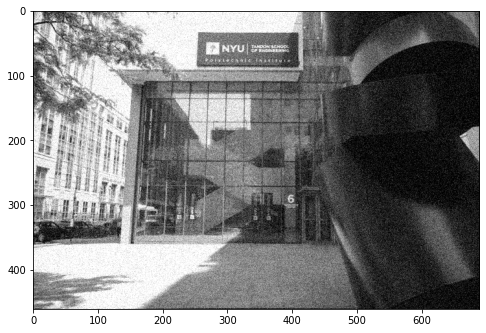

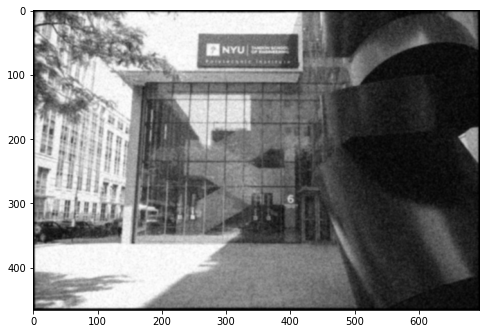

In [5]:
### Denoising Using Filter
from scipy.signal import correlate
import scipy

def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel."""

    x = np.linspace(-nsig, nsig, kernlen+1)
    kern1d = np.diff(scipy.stats.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()
kernel = gkern(6,3)
img_denoise = correlate(noisy,kernel)

plt.figure(figsize=(8,8))
plt.imshow(noisy,'gray')
plt.figure(figsize=(8,8))
plt.imshow(img_denoise,'gray')

(1280, 1920, 3)


Text(0.5, 1.0, '(256, 384, 3)')

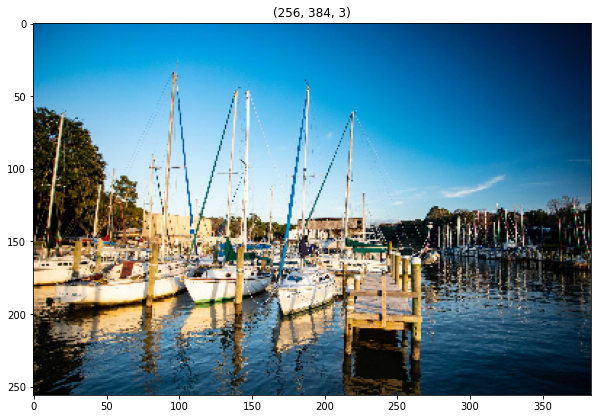

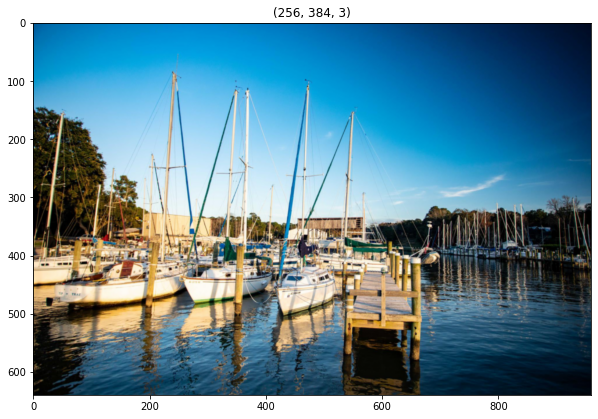

In [6]:
### Anti-Aliasing Filter

im = io.imread('https://www.fairhopeal.gov/Home/ShowPublishedImage/1450/636881500077900000',0)
print(im.shape)
# plt.figure(figsize = (20,20))
# plt.imshow(im)
# plt.title(im.shape)
im2 = cv2.resize(im,None, fx=0.2,fy=0.2, interpolation = cv2.INTER_NEAREST)

plt.figure(figsize = (10,10))
plt.imshow(im2)
plt.title(im2.shape)

im_blurred = np.zeros(im.shape)
im_blurred[:,:,0] = correlate(im[:,:,0],kernel,'same')
im_blurred[:,:,1] = correlate(im[:,:,1],kernel,'same')
im_blurred[:,:,2] = correlate(im[:,:,2],kernel,'same')
im_blurred = np.clip(im_blurred,0,255)
im2_blurred =cv2.resize(im_blurred,None, fx=0.5,fy=0.5, interpolation = cv2.INTER_NEAREST)
plt.figure(figsize = (10,10))
plt.imshow(im2_blurred.astype('uint8'))
plt.title(im2.shape)